In [1]:
%matplotlib inline
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs   
from sklearn import metrics
import seaborn as sns 
import matplotlib.ticker as mtick


In [2]:
colour = sns.color_palette("Set1", 13)
cityname=[" 1.Du", " 2.HK", " 3.Pe", " 4.Pa", " 5.Bo", " 6.Ki", " 7.Pi", " 8.Cr", " 9.Ab", " 10.Bl", " 11.Au", " 12.Dl"]

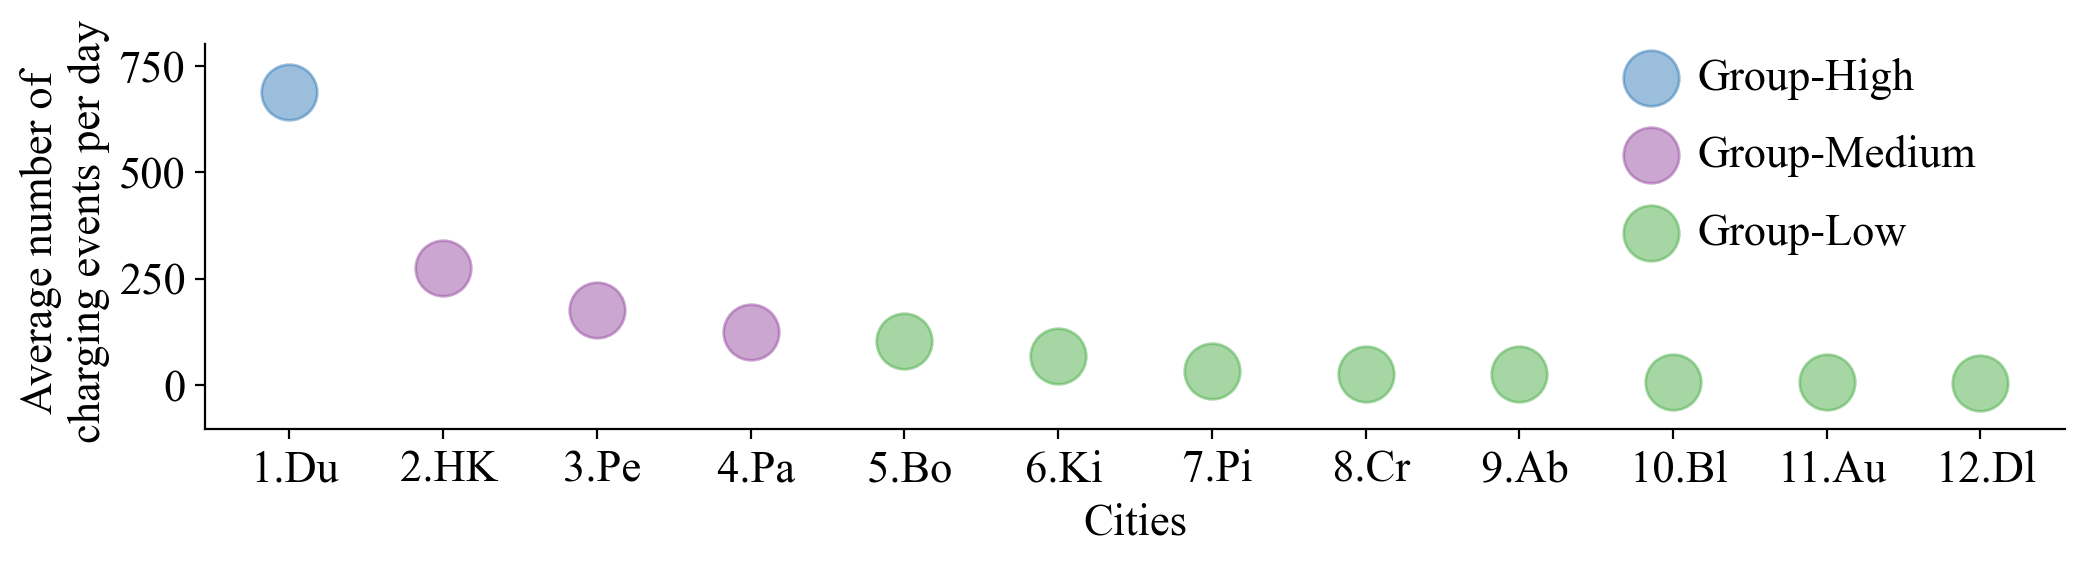

<Figure size 640x480 with 0 Axes>

In [3]:
#for K-means results
data=pd.read_csv(r'k-means-data.csv',sep=',')
X1=data.iloc[:,2].values.reshape(-1, 1)
X = StandardScaler().fit_transform(X1) 
Kmeans=KMeans(n_clusters=3,random_state=1) 
a=Kmeans.fit(X)
#print(Kmeans.labels_,a)

#figure
size=16
s=400
alpha=0.5
fig=plt.figure(figsize=(12,2.5), dpi=200)
plt.rc('font',family='Times New Roman', size=size)
ax = plt.axes(polar=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.scatter(range(1,2),X1[0:1,0],color=colour[1],label="Group-High",alpha=alpha,s=s)  
ax.scatter(range(2,5),X1[1:4,0],color=colour[3],label="Group-Medium",alpha=alpha,s=s)  
ax.scatter(range(5,13,1),X1[4:13,0],color=colour[2],label="Group-Low",alpha=alpha,s=s)  
plt.xticks(range(1,13,1),cityname,size=size)
plt.ylim(-104,800)

ax.set_facecolor(colour[0])
ax.patch.set_alpha(0) 

ax.set_ylabel("Average number of \n charging events per day",labelpad = 3)   
ax.set_xlabel("Cities")
ax.legend(ncol=1, framealpha=0,labelspacing=0.8,bbox_to_anchor=(0.75,0.35),handlelength=0.5)
plt.show()
plt.savefig('Figure_1_b.png', transparent=True, bbox_inches='tight', pad_inches=0.0)

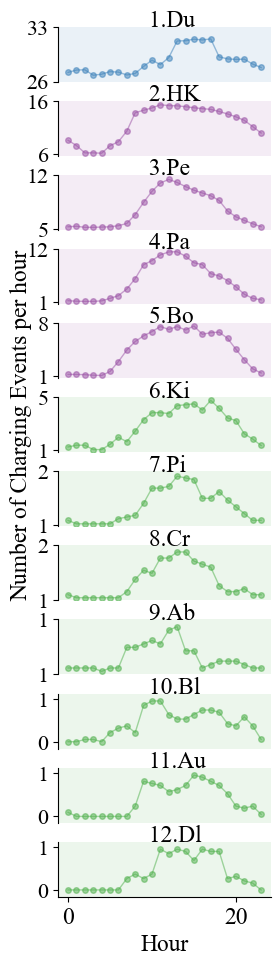

<Figure size 640x480 with 0 Axes>

In [5]:
#for charging demand pattern per hour
datacity=pd.read_csv(r'city_charging demand.csv',sep=',').iloc[:-1,:]
datacity1=datacity[["week","hour","1-Perth", "2-XIANGGANG", "3-PALO", "4-DUNDEE", "5-BOULDER", "6-Auchterarder", "7-Kinross", "8-Pitlochry", "9-Crieff","10-Aberfeldy", "11-Dunkeld", "12-Blairgowrie"]]

size=17
l=12
index=[4, 2, 1, 3, 5, 7, 8, 9, 10, 12, 6, 11]

fig=plt.figure(figsize=(6,11.3), dpi=100)
plt.rc('font',family='Times New Roman', size=size)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.19,hspace=0.35)

for i in range(1,13):
    t=datacity1.groupby("hour").agg([np.mean]).iloc[:,index[i-1]]
    ax=plt.subplot(12,2,2*i-1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    if i==1:
        c=1
    if (i>1) and (i<=4):
        c=3
    if i>5:
        c=2
    ax.set_facecolor(colour[c])
    ax.patch.set_alpha(0.1) 
    plt.plot(t, color=colour[c],marker=".",markersize=8,linewidth=1,alpha=0.5)
    plt.title(cityname[i-1],fontdict={'size':size},loc = 'left',x=.4,y=0.85)
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.f'))
    plt.yticks((min(t)*0.97,max(t)*1.05),fontsize=size-1)  
    
    if i<12:
        plt.xticks([])
    if i>=10:
        plt.ylim(-0.1,max(t)*1.18)
    if i==6:  
        plt.ylabel("Number of Charging Events per hour")
    if i==12:
        plt.xlabel("Hour")
        ax.spines['bottom'].set_visible(True)
plt.show()
plt.savefig('Figure_1_c.png', transparent=True, bbox_inches='tight', pad_inches=0.0)

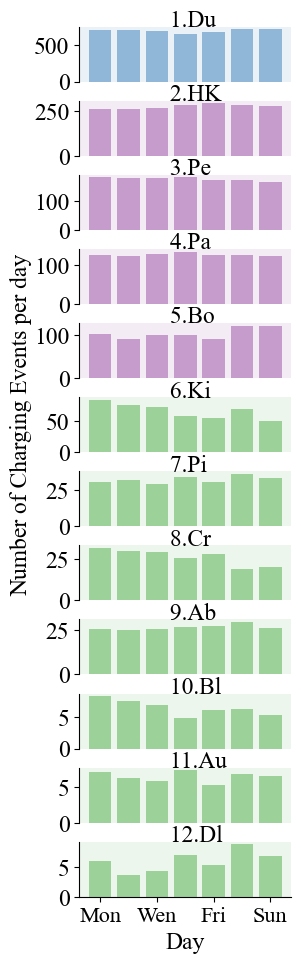

<Figure size 640x480 with 0 Axes>

In [6]:
#for charging demand pattern per day 
fig=plt.figure(figsize=(6,11.3), dpi=100)
plt.rc('font',family='Times New Roman', size=size)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.19,hspace=0.35)

for i in range(1,13):
    t=datacity1.groupby("week").agg([np.mean]).iloc[:,index[i-1]]
    ax=plt.subplot(12,2,2*i-1)
 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    if i==1:
        c=1
        alpha=0.5
    if (i>1) and (i<=4):
        c=3
        alpha=0.5
    if i>5:
        c=2 
        alpha=0.5

    ax.set_facecolor(colour[c])
    ax.patch.set_alpha(0.1) 
    
    plt.bar(range(1,len(t)+1),t*24, color=colour[c],alpha=0.5,)#marker=".",markersize=8,linewidth=1
    plt.xticks([1,3,5,7],['Mon','Wen','Fri','Sun'], size=size-1)
    plt.title(cityname[i-1],fontdict={'size':size},loc = 'left',x=.4,y=0.85)
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.f'))   
    
    if i<12:
        plt.xticks([])
    if i==6:  
        plt.ylabel("Number of Charging Events per day",labelpad = 10)
        
    if i==12:
        plt.xlabel("Day")
        ax.spines['bottom'].set_visible(True)
plt.show()
plt.savefig('Figure_1_d.png', transparent=True, bbox_inches='tight', pad_inches=0.0)